In [9]:
import importlib 
KMeans = importlib.import_module("K-Means")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import glob
from importlib import reload 
plt=reload(plt)
glob = reload(glob)

In [10]:

path = "dataset/*.xlsx"

""" mlem = [] 
df = pd.DataFrame() 
dataFiles = None 
for shit in glob.glob(path): print(shit)
for f in glob.glob(path):
        dataFiles = pd.read_excel(f, sheet_name=None)
        print(f)
        mlem.append(dataFiles)
        print(dataFiles.values())
        concatDf = pd.concat(dataFiles.values())
print(mlem) """

#! generator approach 
#? including arg sheet_name = None turns the df object into a dictionary with keys=sheetname and values = data
def read(fpath): 
        df_dict = pd.read_excel(fpath, sheet_name=None) 
        df = pd.concat(df_dict.values(), ignore_index=True)
        return df


dat_frame = pd.concat(read(fpath) for fpath in glob.glob(path))
dat_frame

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,Items,Qty,Price,Total
2,NaN,Anchovies,28,25,700
3,NaN,Baby Hamour,12.3,28.37,349
4,NaN,Badah,10.66,25.59,272.74
...,...,...,...,...,...
111,NaN,Frozen Squid,2,34,68
112,NaN,Frozen Squid Rings,59,17.898305,1056
113,NaN,Frozen Squid Tube,540,17.212963,9295
114,NaN,Frozen Tuna Saku,34.8,74.03,2576.4


In [11]:
# cleanup df 
dat_frame = dat_frame.iloc[:,1:].drop([0,1]).dropna()
# dat_frame.rename(columns={"Unnamed: 1":"items", "Unnamed: 2":"Quantity", "Unnamed: 3": "Cost", "Unnamed: 4":"Revenue"})

# * naive approach 
dat_frame = dat_frame[dat_frame["Unnamed: 1"].str.contains("Items")==False]
dat_frame = dat_frame[dat_frame["Unnamed: 1"].str.contains("Item")==False]
# print(dat_frame.to_string())
# dat_frame = dat_frame[dat_frame.columns != "Price"]
# rm_strs = ['Price', 'Qty', 'Total','Totoal','Item']
# dat_frame = dat_frame[dat_frame.columns.str.isdigit()].fillna(True) 

In [12]:
X = dat_frame[['Unnamed: 2', 'Unnamed: 3']].astype(int)
# X_ = np.array(X,dtype=int)
X 
# X.describe

,Unnamed: 2,Unnamed: 3
2,28,25
3,12,28
4,10,25
5,1094,13
6,154,21
...,...,...
111,2,34
112,59,17
113,540,17
114,34,74


Text(0, 0.5, 'Cost/kg')

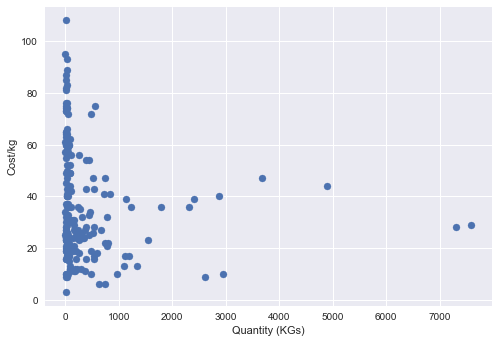

In [13]:
plt.close() 
plt.style.use('seaborn')
# plt.bar(X, X['Unnamed: 1'])
plt.scatter(X['Unnamed: 2'], X['Unnamed: 3'])
plt.xlabel('Quantity (KGs)')
plt.ylabel('Cost/kg')

In [14]:

model = KMeans.KMeans(KMeans.randomClusterInit,2)
(clusters,clustersData) = model.fit(X) 

d:\.codeEnv\dummyKmeanSales\K-Means.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clusterElements =  X[labels == clusterMeanIndex]


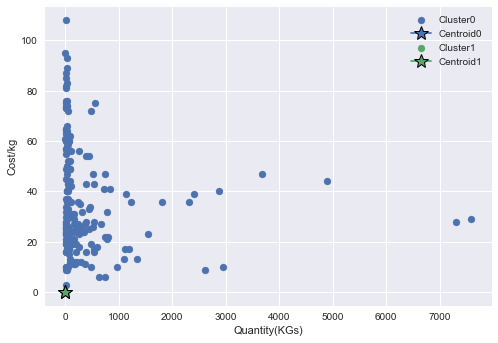

In [15]:
plt.close()
for i, clusterMean in enumerate(clusters):
    indvidualDatCluster = clustersData[clustersData[:,-1]==i]

    plt.scatter(indvidualDatCluster[:,0], indvidualDatCluster[:,1], label='Cluster' + str(i))
    plt.plot(clusterMean[0], clusterMean[1], label ='Centroid' + str(i), marker='*', markersize=15, markeredgecolor="k", markeredgewidth=1)
    plt.xlabel('Quantity(KGs)')
    plt.ylabel('Cost/kg')
    plt.style.use('seaborn')
    plt.legend()